In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TensorFlow 2.x selected.
Version:  2.0.0-rc0
Eager mode:  True
Hub version:  0.6.0
GPU is NOT AVAILABLE


In [2]:
train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data, validation_data), test_data = tfds.load(
    name="imdb_reviews", 
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


In [3]:
!ls

sample_data


In [4]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: id=224, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story p

In [5]:
train_labels_batch

<tf.Tensor: id=225, shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>

In [10]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)

hub_layer(train_examples_batch[:3])

<tf.Tensor: id=835, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

In [7]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [0]:
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(mode="auto",monitor="val_loss",factor=0.3,patience=5,verbose=1,min_lr=0.00001)
checkpoint = tf.keras.callbacks.ModelCheckpoint("model_sentiment.h5",monitor="val_loss",verbose=1,save_best_only=True,mode="auto")
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,verbose=1,mode="auto")

In [14]:
history = model.fit( train_data.shuffle(1000).batch(512), epochs=20, validation_data = validation_data.batch(512), verbose=1 , callbacks=[reduce_lr_plateau, checkpoint, early_stopping])

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


     30/Unknown - 6s 184ms/step - loss: 1.1309 - accuracy: 0.5103
Epoch 00001: val_loss improved from inf to 0.74795, saving model to model_sentiment.h5
30/30 [==============================] - 9s 288ms/step - loss: 1.1309 - accuracy: 0.5103 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
19/20 [===========================>..] - ETA: 0s - loss: 0.7191 - accuracy: 0.5331
Epoch 00002: val_loss improved from 0.74795 to 0.67147, saving model to model_sentiment.h5
30/30 [==============================] - 7s 249ms/step - loss: 0.7135 - accuracy: 0.5504 - val_loss: 0.6715 - val_accuracy: 0.5879
Epoch 3/20
19/20 [===========================>..] - ETA: 0s - loss: 0.6509 - accuracy: 0.6236
Epoch 00003: val_loss improved from 0.67147 to 0.63375, saving model to model_sentiment.h5
30/30 [==============================] - 8s 254ms/step - loss: 0.6487 - accuracy: 0.6287 - val_loss: 0.6338 - val_accuracy: 0.6399
Epoch 4/20
19/20 [===========================>..] - ETA: 0s - loss: 0.6165 -

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12,10)})
import pandas as pd

In [22]:
history_df = pd.DataFrame(history.history)
history_df["epochs"] = history.epoch
history_df.head(3)

,loss,accuracy,val_loss,val_accuracy,lr,epochs
0,1.140717,0.510267,0.747955,0.4905,0.001,0
1,0.703824,0.550400,0.671471,0.5879,0.001,1
2,0.644779,0.628733,0.633752,0.6399,0.001,2


In [0]:
def plot(history):
  plt.subplot(2,1,1)
  plt.plot(history["epochs"],history["loss"],marker='o',label="training")
  plt.plot(history["epochs"],history["val_loss"],marker='o',label="validation")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)
  plt.legend()
  plt.title("Loss Graph")
  plt.show()

  plt.subplot(2,1,2)
  plt.plot(history["epochs"],history["accuracy"],marker='o',label="training")
  plt.plot(history["epochs"],history["val_accuracy"],marker='o',label="validation")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.grid(True)
  plt.legend()
  plt.title("Accuracy Graph")
  plt.show()

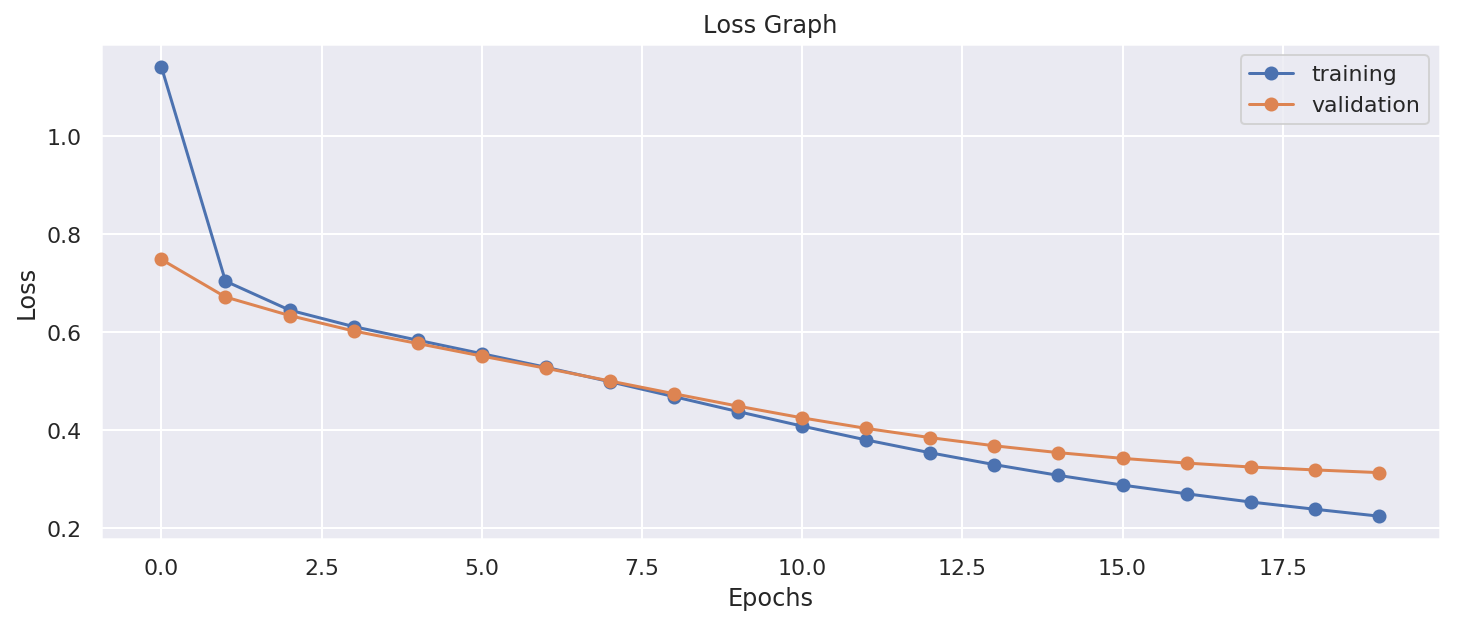

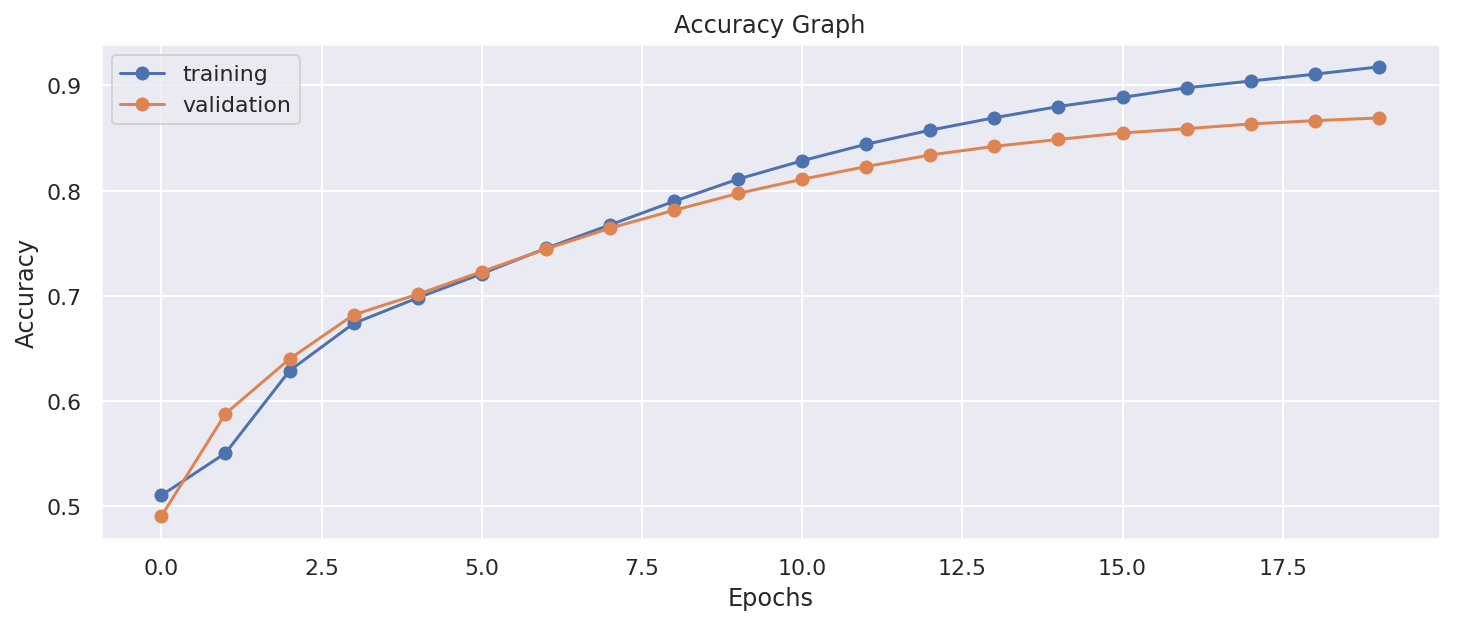

In [28]:
plot(history_df)

In [29]:
results = model.evaluate(test_data.batch(512),verbose=1)
for name, value in zip(model.metrics_names,results):
  print("%s: %.3f"%(name, value))

49/49 [==============================] - 5s 111ms/step - loss: 0.3305 - accuracy: 0.8560
loss: 0.330
accuracy: 0.856
